In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('200619.csv', index_col=0)
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,2014,Unnamed: 5,2015,Unnamed: 7,2016,Unnamed: 9,2017,Unnamed: 11,2018,Unnamed: 13,2019,Unnamed: 15
NaN,NaN,NaN,NaN,NON-OP,OP,NON-OP,OP,NON-OP,OP,NON-OP,OP,NON-OP,OP,NON-OP,OP
CO(ppb),N,1.0,Waiting room,533.3,660.5,448.9,528.3,359.7,439.3,367.2,450,410.3,476.9,432.5,501.7
CO(ppb),SS,2.0,Waiting room,589,656.9,508.9,559.8,415.2,461.6,375.4,412.6,310.9,351.2,365,407.2
CO(ppb),S,1.0,Waiting room,677.6,790.7,448.1,542.9,530.9,629.5,457.8,537.4,316.3,375.1,418.3,482.1
CO(ppb),S,2.0,Waiting room,512,603.6,389.6,478.4,397.4,492.8,349.8,418.9,316.3,375.1,399.6,456
CO(ppb),S,1.0,Platform,655.2,736,472.6,544.4,444.6,525.4,386.8,439.7,423.6,463.6,429.7,466.3
CO(ppb),S,2.0,Platform,487,540.9,411.8,464.3,436.4,498.6,420.8,479.8,417.6,468.4,424.3,468.8
CO2,N,1.0,Waiting room,424.2,542,425.7,553.8,441.3,574,457.9,570.3,438.4,544.4,419.3,521.5
CO2,SS,2.0,Waiting room,437.3,510.1,447.6,528.7,455.7,544.3,453.9,543.3,434.5,528.4,426.7,528.9
CO2,S,1.0,Waiting room,457.6,606.8,455.4,643.9,471.1,694,437.9,651.3,432.3,602.1,393.5,598.8


In [2]:
# remove the unnecessary row
df = df.drop(['Unnamed: 2','Unnamed: 1','Unnamed: 3'],axis=1)

# multiindexing
df.columns = pd.MultiIndex.from_product([[2014,2015,2016,2017,2018,2019],['NON-OP','OP']])

# Multi columns에서 원하는 컬럼만 선택하는 방법
op = df.iloc[:, df.columns.get_level_values(1)=='OP']
non = df.iloc[:, df.columns.get_level_values(1)=='NON-OP']

# column setting
non.columns = [2014,2015,2016,2017,2018,2019]
op.columns = [2014,2015,2016,2017,2018,2019]

# loc
non_co = non.loc['CO(ppb)']
non_co2 = non.loc['CO2']
non_no2 = non.loc['NO2(ppb)']
non_pm10 = non.loc['PM10']
non_pm25 = non.loc['PM2.5']
non_hcho = non.loc['HCHO']

op_co = op.loc['CO(ppb)']
op_co2 = op.loc['CO2']
op_no2 = op.loc['NO2(ppb)']
op_pm10 = op.loc['PM10']
op_pm25 = op.loc['PM2.5']
op_hcho = op.loc['HCHO']

# to_numeric
non_co = non_co.astype(float)
non_co2= non_co2.astype(float)
non_no2= non_no2.astype(float)
non_pm10= non_pm10.astype(float)
non_pm25= non_pm25.astype(float)
non_hcho= non_hcho.astype(float)

op_co = op_co.astype(float)
op_co2= op_co2.astype(float)
op_no2= op_no2.astype(float)
op_pm10= op_pm10.astype(float)
op_pm25= op_pm25.astype(float)
op_hcho= op_hcho.astype(float)

# 행, 열 변환
non_co = non_co.T
non_co2= non_co2.T
non_no2= non_no2.T
non_pm10= non_pm10.T
non_pm25= non_pm25.T
non_hcho= non_hcho.T

op_co = op_co.T
op_co2= op_co2.T
op_no2= op_no2.T
op_pm10= op_pm10.T
op_pm25= op_pm25.T
op_hcho= op_hcho.T

# 평균 내기

non_co['mean'] = non_co.mean(axis=1)
non_co2['mean']= non_co2.mean(axis=1)
non_no2['mean']= non_no2.mean(axis=1)
non_pm10['mean']= non_pm10.mean(axis=1)
non_pm25['mean']= non_pm25.mean(axis=1)
non_hcho['mean']= non_hcho.mean(axis=1)

op_co['OP'] = op_co.mean(axis=1)
op_co2['OP']= op_co2.mean(axis=1)
op_no2['OP']= op_no2.mean(axis=1)
op_pm10['OP']= op_pm10.mean(axis=1)
op_pm25['OP']= op_pm25.mean(axis=1)
op_hcho['OP']= op_hcho.mean(axis=1)

non_co['std'] = non_co.std(axis=1)
non_co2['std']= non_co2.std(axis=1)
non_no2['std']= non_no2.std(axis=1)
non_pm10['std']= non_pm10.std(axis=1)
non_pm25['std']= non_pm25.std(axis=1)
non_hcho['std']= non_hcho.std(axis=1)
op_co['op_std'] = op_co.std(axis=1)
op_co2['op_std']= op_co2.std(axis=1)
op_no2['op_std']= op_no2.std(axis=1)
op_pm10['op_std']= op_pm10.std(axis=1)
op_pm25['op_std']= op_pm25.std(axis=1)
op_hcho['op_std']= op_hcho.std(axis=1)

op_co['NON'] = non_co['mean']
op_co2['NON'] = non_co2['mean']
op_no2['NON'] = non_no2['mean']
op_pm10['NON'] = non_pm10['mean']
op_pm25['NON'] = non_pm25['mean']
op_hcho['NON'] = non_hcho['mean']

op_co['NON_std'] = non_co['std']
op_co2['NON_std'] = non_co2['std']
op_no2['NON_std'] = non_no2['std']
op_pm10['NON_std'] = non_pm10['std']
op_pm25['NON_std'] = non_pm25['std']
op_hcho['NON_std'] = non_hcho['std']

# 만약 dataframe.mean()이 안먹힌다면 형변환이 필요한 것.(문자->숫자)

In [3]:
op_co

,CO(ppb),CO(ppb),CO(ppb),CO(ppb),CO(ppb),CO(ppb),OP,op_std,NON,NON_std
2014,660.5,656.9,790.7,603.6,736.0,540.9,664.766667,81.749407,575.683333,71.418821
2015,528.3,559.8,542.9,478.4,544.4,464.3,519.683333,35.602313,446.650000,38.783276
2016,439.3,461.6,629.5,492.8,525.4,498.6,507.866667,60.905601,430.700000,52.687570
2017,450.0,412.6,537.4,418.9,439.7,479.8,456.400000,42.334186,392.966667,36.175391
2018,476.9,351.2,375.1,375.1,463.6,468.4,418.383333,52.011070,365.833333,51.508629
2019,501.7,407.2,482.1,456.0,466.3,468.8,463.683333,29.059905,411.566667,23.402825


In [4]:
# non_co['mean'].plot()
# non_co2['mean'].plot()
# non_pm10['mean'].plot()
# non_hcho['mean'].plot()
# non_pm25['mean'].plot()

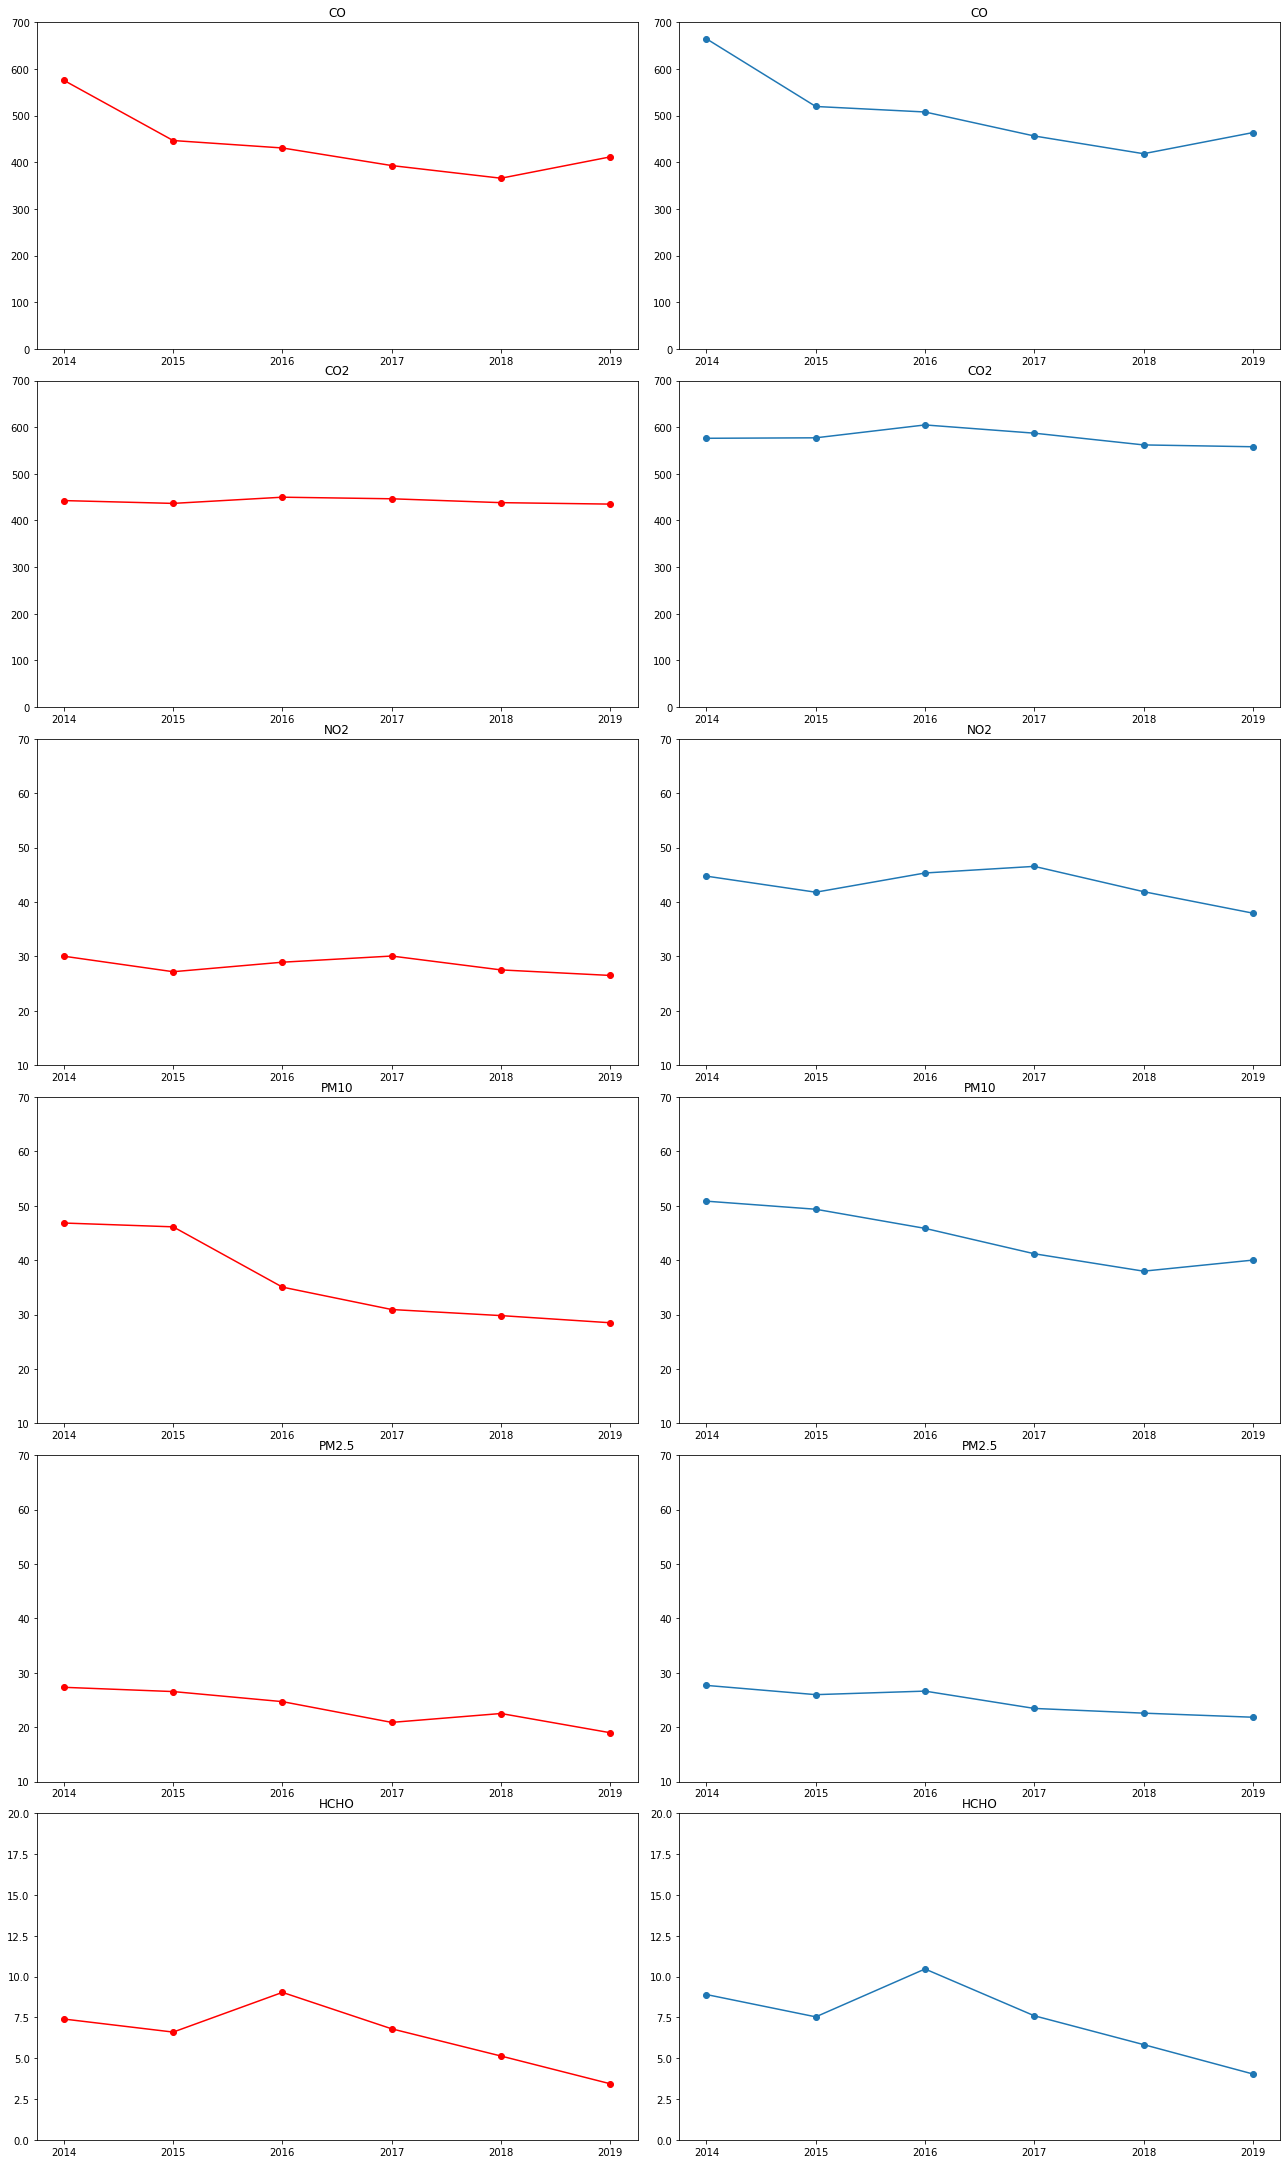

In [5]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7, ax8), (ax9, ax10),(ax11,ax12)) = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(18,30)

plt.tight_layout()
# op_co['mean'].plot(color = 'r', marker ='o',ylim=[0,700],title='CO', ax = ax1)
# op_co['mean'].plot(marker ='o',ylim=[0,700],title='CO', ax = ax2)

# op_co2['mean'].plot(marker ='o',ylim=[0,700],title='CO2',ax= ax3)
# op_co2['mean'].plot(marker ='o',ylim=[0,700],title='CO2',ax= ax4)

# op_no2['mean'].plot(marker ='o',title='NO2',ylim=[10,70],ax=ax5)
# op_no2['mean'].plot(marker ='o',title='NO2',ylim=[10,70],ax=ax6)

# op_pm10['mean'].plot(marker ='o',title='PM10',ylim=[10,70],ax=ax7)
# op_pm10['mean'].plot(marker ='o',title='PM10',ylim=[10,70],ax=ax8)

# op_pm25['mean'].plot(marker ='o',title='PM2.5',ylim=[10,70],ax=ax9)
# op_pm25['mean'].plot(marker ='o',title='PM2.5',ylim=[10,70],ax=ax10)

# op_hcho['mean'].plot(marker ='o',title='HCHO',ylim=[0,20],ax=ax11)
# op_hcho['mean'].plot(marker ='o',title='HCHO',ylim=[0,20],ax=ax12)

op_co['NON'].plot(color = 'r', marker ='o',ylim=[0,700],title='CO', ax = ax1)
op_co['OP'].plot(marker ='o',ylim=[0,700],title='CO', ax = ax2)
op_co2['NON'].plot(color = 'r',marker ='o',ylim=[0,700],title='CO2',ax= ax3)
op_co2['OP'].plot(marker ='o',ylim=[0,700],title='CO2',ax= ax4)
op_no2['NON'].plot(color = 'r',marker ='o',title='NO2',ylim=[10,70],ax=ax5)
op_no2['OP'].plot(marker ='o',title='NO2',ylim=[10,70],ax=ax6)
op_pm10['NON'].plot(color = 'r',marker ='o',title='PM10',ylim=[10,70],ax=ax7)
op_pm10['OP'].plot(marker ='o',title='PM10',ylim=[10,70],ax=ax8)
op_pm25['NON'].plot(color = 'r',marker ='o',title='PM2.5',ylim=[10,70],ax=ax9)
op_pm25['OP'].plot(marker ='o',title='PM2.5',ylim=[10,70],ax=ax10)
op_hcho['NON'].plot(color = 'r',marker ='o',title='HCHO',ylim=[0,20],ax=ax11)
op_hcho['OP'].plot(marker ='o',title='HCHO',ylim=[0,20],ax=ax12)


In [6]:
# 추세선 그리기

In [7]:
# non_co['mean']
# op_co = op_co['mean']
# op_co

In [8]:
op_co

,CO(ppb),CO(ppb),CO(ppb),CO(ppb),CO(ppb),CO(ppb),OP,op_std,NON,NON_std
2014,660.5,656.9,790.7,603.6,736.0,540.9,664.766667,81.749407,575.683333,71.418821
2015,528.3,559.8,542.9,478.4,544.4,464.3,519.683333,35.602313,446.650000,38.783276
2016,439.3,461.6,629.5,492.8,525.4,498.6,507.866667,60.905601,430.700000,52.687570
2017,450.0,412.6,537.4,418.9,439.7,479.8,456.400000,42.334186,392.966667,36.175391
2018,476.9,351.2,375.1,375.1,463.6,468.4,418.383333,52.011070,365.833333,51.508629
2019,501.7,407.2,482.1,456.0,466.3,468.8,463.683333,29.059905,411.566667,23.402825


#  폰트 설정

In [11]:
import matplotlib as mpl
mpl.font_manager.get_fontconfig_fonts()
mpl.rcParams['font.family'] = 'Times New Roman'
font1 = {'family': 'Times New Roman', 'color':  'black', 'size': 12, 'weight' : 'bold'}


## 그래프 포맷

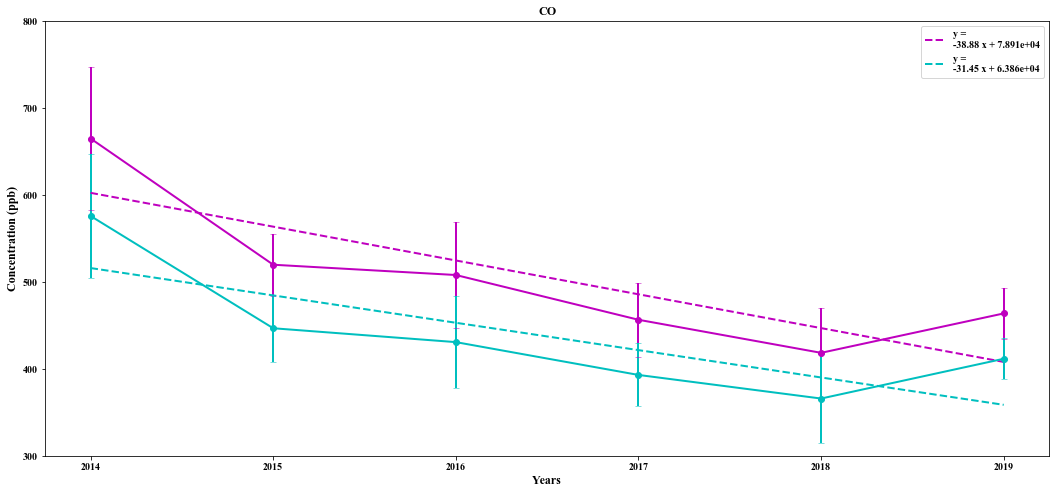

In [36]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,8)


# 회귀선 세팅
year=[2014,2015,2016,2017,2018,2019]
fp1 = np.polyfit(year, op_co['OP'], 1)
f1 = np.poly1d(fp1)
fp2 = np.polyfit(year, op_co['NON'], 1)
f2 = np.poly1d(fp2)

plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_co['OP'], # Y
yerr=op_co['op_std'], # Y-errors
fmt="mo-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='m', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)
# plot second line graph
plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_co['NON'], # Y
yerr=op_co['NON_std'], # Y-errors
fmt="co-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='c', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)

## Settings
# plt.legend() # show figure legend
plt.ylabel('Concentration (ppb)',fontdict = font1)
plt.xlabel('Years',fontdict = font1)
plt.title('CO',fontdict = font1)
plt.plot(year, f1(year), lw=2, color='m',ls='--',label= 'y = %s'%f1)

plt.plot(year, f2(year), lw=2, color='c', ls='--', label='y = %s' %f2)

# plt.yscale('log') #Set y-axis scale
# plt.xlim((0.5,4.5)) #Set X-axis limits
plt.ylim((300,800)) #Set Y-axis limits
# plt.xticks([1,2,3,4]) #get only ticks we want
# plt.yticks([0,5,10,15,20])
 
## showing plot

plt.legend()
plt.show(ax1)



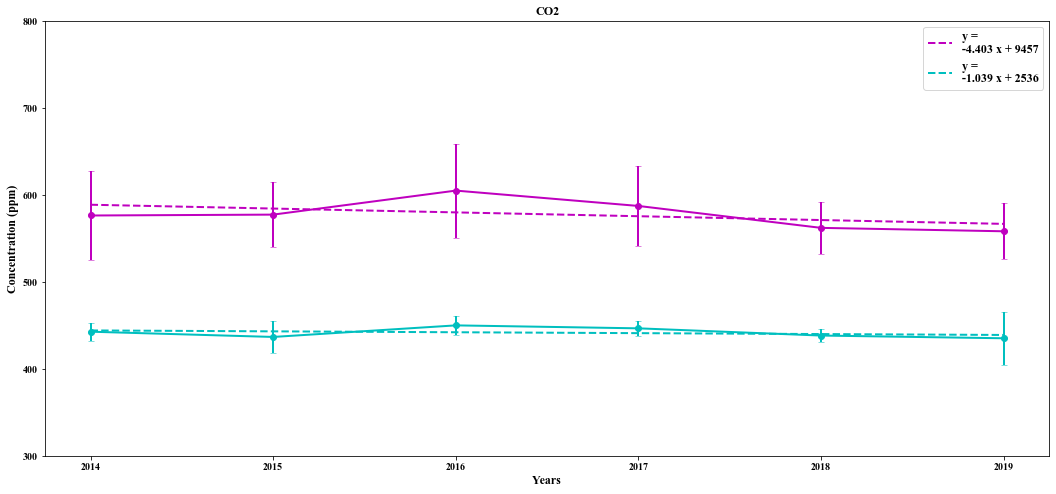

In [29]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,8)


# 회귀선 세팅
year=[2014,2015,2016,2017,2018,2019]
fp1 = np.polyfit(year, op_co2['OP'], 1)
f1 = np.poly1d(fp1)
fp2 = np.polyfit(year, op_co2['NON'], 1)
f2 = np.poly1d(fp2)

plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_co2['OP'], # Y
yerr=op_co2['op_std'], # Y-errors
fmt="mo-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='m', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)
# plot second line graph
plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_co2['NON'], # Y
yerr=op_co2['NON_std'], # Y-errors
fmt="co-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='c', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)

## Settings
# plt.legend() # show figure legend
plt.ylabel('Concentration (ppm)',fontdict=font1)
plt.xlabel('Years',fontdict=font1)
plt.title('CO2',fontdict=font1)
plt.plot(year, f1(year), lw=2, color='m',ls='--',label='y = %s'%f1)
plt.plot(year, f2(year), lw=2, color='c',ls='--', label='y = %s'%f2)

# plt.yscale('log') #Set y-axis scale
# plt.xlim((0.5,4.5)) #Set X-axis limits
plt.ylim((300,800)) #Set Y-axis limits
# plt.xticks([1,2,3,4]) #get only ticks we want
# plt.yticks([0,5,10,15,20])
 
## showing plot
plt.legend(fontsize=12)
plt.show()



In [14]:
op_co2

,CO2,CO2,CO2,CO2,CO2,CO2,OP,op_std,NON,NON_std
2014,542.0,510.1,606.8,670.3,559.1,569.4,576.283333,51.102231,442.683333,10.257910
2015,553.8,528.7,643.9,599.0,558.2,580.2,577.300000,36.954657,436.650000,18.578908
2016,574.0,544.3,694.0,662.8,582.6,571.8,604.916667,54.023588,449.950000,11.073805
2017,570.3,543.3,651.3,650.5,554.1,554.0,587.250000,45.691639,446.550000,8.244948
2018,544.4,528.4,602.1,602.1,532.9,562.5,562.066667,30.281384,438.250000,7.669583
2019,521.5,528.9,598.8,602.6,536.5,560.5,558.133333,32.406927,435.133333,30.342306


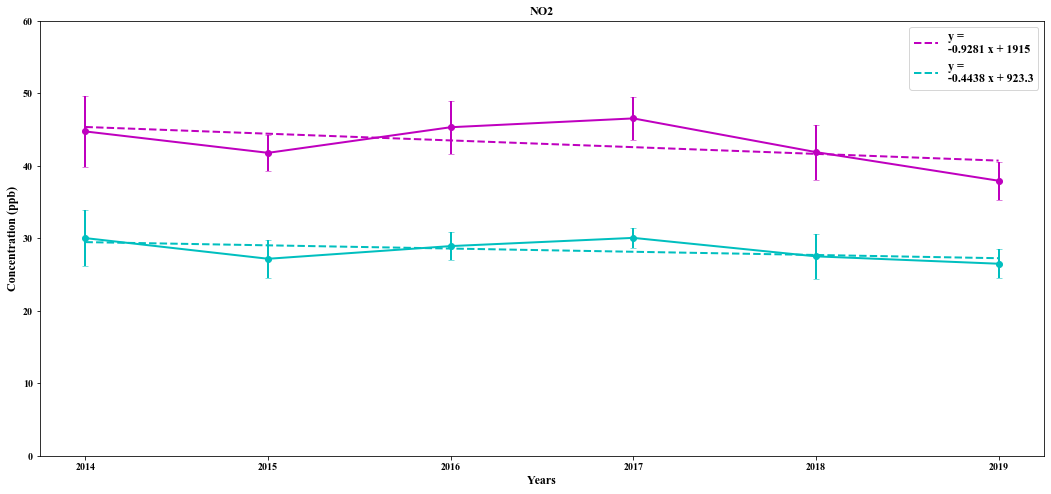

In [30]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,8)

# 회귀선 세팅
year=[2014,2015,2016,2017,2018,2019]
fp1 = np.polyfit(year, op_no2['OP'], 1)
f1 = np.poly1d(fp1)
fp2 = np.polyfit(year, op_no2['NON'], 1)
f2 = np.poly1d(fp2)

plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_no2['OP'], # Y
yerr=op_no2['op_std'], # Y-errors
fmt="mo-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='m', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)
# plot second line graph
plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_no2['NON'], # Y
yerr=op_no2['NON_std'], # Y-errors
fmt="co-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='c', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)

## Settings
# plt.legend() # show figure legend
plt.ylabel('Concentration (ppb)',fontdict= font1)
plt.xlabel('Years',fontdict= font1)
plt.title('NO2',fontdict= font1)
plt.plot(year, f1(year), lw=2, color='m',ls='--',label='y = %s'%f1)
plt.plot(year, f2(year), lw=2, color='c',ls='--', label='y = %s'%f2)

plt.ylim((0,60)) #Set Y-axis limits

## showing plot
plt.legend(fontsize=12)
plt.show()



In [16]:
op_no2

,NO2(ppb),NO2(ppb),NO2(ppb),NO2(ppb),NO2(ppb),NO2(ppb),OP,op_std,NON,NON_std
2014,42.9,37.3,49.8,43.9,42.7,51.9,44.750000,4.838647,30.033333,3.886158
2015,41.6,41.7,39.8,39.2,41.6,46.9,41.800000,2.478575,27.183333,2.623240
2016,45.6,43.2,41.2,45.4,43.8,52.8,45.333333,3.647221,28.933333,1.918912
2017,41.6,49.6,44.4,46.8,46.6,50.3,46.550000,2.959589,30.066667,1.387644
2018,37.6,38.9,40.4,40.4,46.4,47.7,41.900000,3.783297,27.516667,3.137630
2019,35.5,34.2,40.0,40.8,36.6,40.6,37.950000,2.621545,26.500000,2.004994


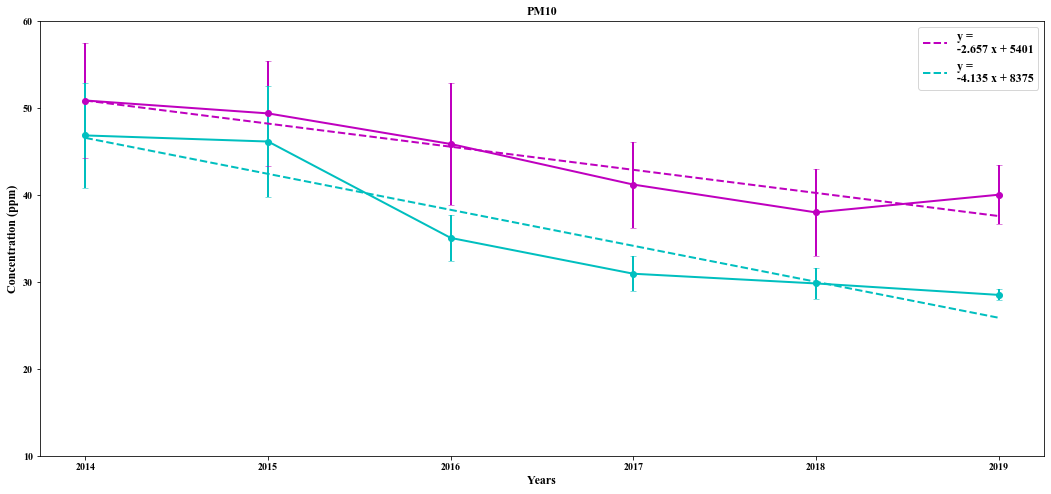

In [31]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,8)

# 회귀선 세팅
year=[2014,2015,2016,2017,2018,2019]
fp1 = np.polyfit(year, op_pm10['OP'], 1)
f1 = np.poly1d(fp1)
fp2 = np.polyfit(year, op_pm10['NON'], 1)
f2 = np.poly1d(fp2)

plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_pm10['OP'], # Y
yerr=op_pm10['op_std'], # Y-errors
fmt="mo-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='m', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)
# plot second line graph
plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_pm10['NON'], # Y
yerr=op_pm10['NON_std'], # Y-errors
fmt="co-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='c', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)

## Settings
# plt.legend() # show figure legend
plt.ylabel('Concentration (ppm)',fontdict=font1)
plt.xlabel('Years',fontdict=font1)
plt.title('PM10',fontdict=font1)
plt.plot(year, f1(year), lw=2, color='m',ls='--',label='y = %s'%f1)
plt.plot(year, f2(year), lw=2, color='c',ls='--', label='y = %s'%f2)

# plt.yscale('log') #Set y-axis scale
# plt.xlim((0.5,4.5)) #Set X-axis limits
plt.ylim((10,60)) #Set Y-axis limits

## showing plot
plt.legend(fontsize=12)
plt.show()



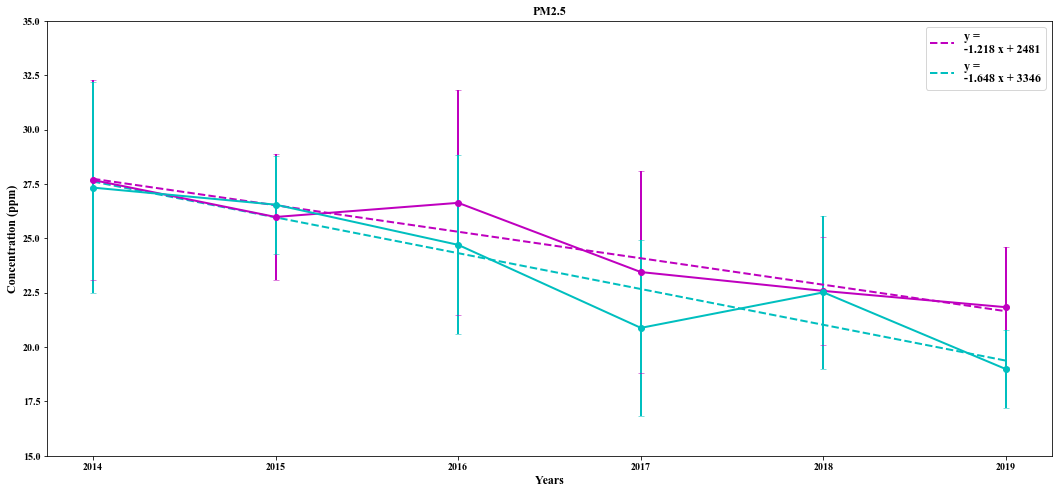

In [32]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,8)

# 회귀선 세팅
year=[2014,2015,2016,2017,2018,2019]
fp1 = np.polyfit(year, op_pm25['OP'], 1)
f1 = np.poly1d(fp1)
fp2 = np.polyfit(year, op_pm25['NON'], 1)
f2 = np.poly1d(fp2)

plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_pm25['OP'], # Y
yerr=op_pm25['op_std'], # Y-errors
fmt="mo-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='m', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)
# plot second line graph
plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_pm25['NON'], # Y
yerr=op_pm25['NON_std'], # Y-errors
fmt="co-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='c', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)

## Settings
# plt.legend() # show figure legend
plt.ylabel('Concentration (ppm)',fontdict=font1)
plt.xlabel('Years',fontdict=font1)
plt.title('PM2.5',fontdict=font1)
plt.plot(year, f1(year), lw=2, color='m',ls='--',label='y = %s'%f1)
plt.plot(year, f2(year), lw=2, color='c',ls='--', label='y = %s'%f2)

# plt.yscale('log') #Set y-axis scale
# plt.xlim((0.5,4.5)) #Set X-axis limits
plt.ylim((15,35)) #Set Y-axis limits

## showing plot
plt.legend(fontsize=12)
plt.show()



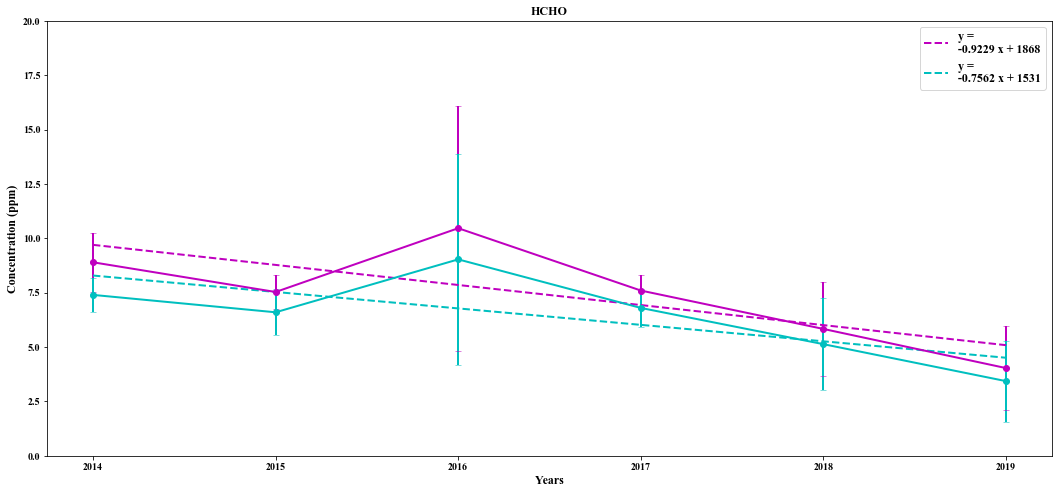

In [33]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,8)


# 회귀선 세팅
year=[2014,2015,2016,2017,2018,2019]
fp1 = np.polyfit(year, op_hcho['OP'], 1)
f1 = np.poly1d(fp1)
fp2 = np.polyfit(year, op_hcho['NON'], 1)
f2 = np.poly1d(fp2)

plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_hcho['OP'], # Y
yerr=op_hcho['op_std'], # Y-errors
fmt="mo-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='m', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)
# plot second line graph
plt.errorbar(
[2014,2015,2016,2017,2018,2019], # X
op_hcho['NON'], # Y
yerr=op_hcho['NON_std'], # Y-errors
fmt="co-", # format line like for plot()
linewidth=2, # width of plot line
elinewidth=2,# width of error bar line
ecolor='c', # color of error bar
capsize=3, # cap length for error bar
capthick=0.5 # cap thickness for error bar
)

## Settings
# plt.legend() # show figure legend
plt.ylabel('Concentration (ppm)',fontdict=font1)
plt.xlabel('Years',fontdict=font1)
plt.title('HCHO',fontdict=font1)
plt.plot(year, f1(year), lw=2, color='m',ls='--',label='y = %s'%f1)
plt.plot(year, f2(year), lw=2, color='c',ls='--', label='y = %s'%f2)

# plt.yscale('log') #Set y-axis scale
# plt.xlim((0.5,4.5)) #Set X-axis limits
plt.ylim((0,20)) #Set Y-axis limits
# plt.xticks([1,2,3,4]) #get only ticks we want
# plt.yticks([0,5,10,15,20])
 
## showing plot
plt.legend(fontsize=12)
plt.show(ax1)



# for seaborn

In [20]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# df = pd.read_csv('200619.csv', index_col=0)
# # remove the unnecessary row
# df = df.drop(['Unnamed: 2','Unnamed: 1','Unnamed: 3'],axis=1)

# # multiindexing
# df.columns = pd.MultiIndex.from_product([[2014,2015,2016,2017,2018,2019],['NON-OP','OP']])

# # df.iloc[:, df.columns.get_level_values(0)==2014
# op = df.iloc[:, df.columns.get_level_values(1)=='OP']
# non = df.iloc[:, df.columns.get_level_values(1)=='NON-OP']

# # column setting
# non.columns = [2014,2015,2016,2017,2018,2019]
# op.columns = [2014,2015,2016,2017,2018,2019]

# # loc
# non_co = non.loc['CO(ppb)']
# non_co2 = non.loc['CO2']
# non_no2 = non.loc['NO2(ppb)']
# non_pm10 = non.loc['PM10']
# non_pm25 = non.loc['PM2.5']
# non_hcho = non.loc['HCHO']

# op_co = op.loc['CO(ppb)']
# op_co2 = op.loc['CO2']
# op_no2 = op.loc['NO2(ppb)']
# op_pm10 = op.loc['PM10']
# op_pm25 = op.loc['PM2.5']
# op_hcho = op.loc['HCHO']

# # to_numeric
# non_co = non_co.astype(float)
# non_co2= non_co2.astype(float)
# non_no2= non_no2.astype(float)
# non_pm10= non_pm10.astype(float)
# non_pm25= non_pm25.astype(float)
# non_hcho= non_hcho.astype(float)

# op_co = op_co.astype(float)
# op_co2= op_co2.astype(float)
# op_no2= op_no2.astype(float)
# op_pm10= op_pm10.astype(float)
# op_pm25= op_pm25.astype(float)
# op_hcho= op_hcho.astype(float)

# # 행, 열 변환
# non_co = non_co.T
# non_co2= non_co2.T
# non_no2= non_no2.T
# non_pm10= non_pm10.T
# non_pm25= non_pm25.T
# non_hcho= non_hcho.T

# op_co = op_co.T
# op_co2= op_co2.T
# op_no2= op_no2.T
# op_pm10= op_pm10.T
# op_pm25= op_pm25.T
# op_hcho= op_hcho.T

In [19]:
# import seaborn as sns
# sns.set(style="darkgrid")
# year=[2014,2015,2016,2017,2018,2019]

# # Load an example dataset with long-form data
# # fmri = op_pm25
# fmr2 = non_pm25
# # Plot the responses for different events and regions
# sns.lineplot(style="event", data=fmr2)


In [20]:
# fmri.columns=['OP','OP','OP','OP','OP','OP']
# fmr2.columns=['NON','NON','NON','NON','NON','NON']

# print(fmri)
# print(fmr2)

In [21]:
# df_OUTER_JOIN = pd.merge(fmri, fmr2, left_index=True,right_index=True, how='outer')
# (df_OUTER_JOIN)

In [22]:
# import seaborn as sns
# sns.set(style="darkgrid")
# year=[2014,2015,2016,2017,2018,2019]

# # Load an example dataset with long-form data
# # fmri = op_pm25
# fmr2 = df_OUTER_JOIN
# # Plot the responses for different events and regions
# sns.lineplot(style="event", data=fmr2)


# 시간 값 x축으로. 그거 히트맵 가능?

# font설정을 위한 고군분투

In [23]:
!fc-list

In [24]:
import matplotlib as mpl
mpl.font_manager.get_fontconfig_fonts()
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.font_manager.get_fontconfig_fonts()

[]

In [25]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.3
설치 위치:  C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\User\.matplotlib
캐시 위치:  C:\Users\User\.matplotlib


In [26]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [27]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

1044


In [39]:
mpl.font_manager.get_fontconfig_fonts()
mpl.rcParams['font.family'] = 'Times New Roman'
# mpl.rcParams['font.weight'] = 'bold'
font1 = {'family': 'Times New Roman', 'color':  'black', 'size': 15, 'weight':'bold'}

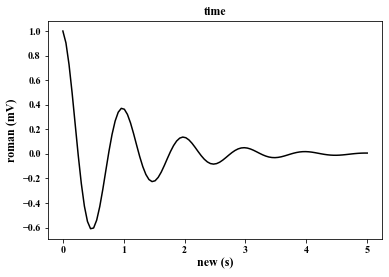

In [29]:

x = np.linspace(0.0, 5.0, 100)
y = np.cos(2*np.pi*x) * np.exp(-x)
plt.plot(x, y, 'k')
plt.title(u'time', fontdict=font1)
plt.xlabel(u'new (s)', fontdict=font1)
plt.ylabel(u'roman (mV)', fontdict=font1)
plt.subplots_adjust()
plt.show()